# Chateau Winery Case Analysis 
- Segementing cutomer based on their wine purchases 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/winedata/chateau.csv')

In [3]:
df.head()

,CustomerNo,customer,PinotNoir,Champagne
0,1,Ebeling,7,34
1,2,England,8,34
2,3,Demburg,5,33
3,4,Eyberg,12,34
4,5,Zabar,9,30


In [4]:
df.shape

(63, 4)

In [5]:
df.describe()

,CustomerNo,PinotNoir,Champagne
count,63.000000,63.000000,63.000000
mean,32.000000,12.730159,16.380952
std,18.330303,8.729273,12.261175
min,1.000000,0.000000,0.000000
25%,16.500000,5.000000,6.000000
50%,32.000000,12.000000,13.000000
75%,47.500000,20.000000,28.500000
max,63.000000,36.000000,38.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerNo  63 non-null     int64 
 1   customer    63 non-null     object
 2   PinotNoir   63 non-null     int64 
 3   Champagne   63 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.1+ KB


In [7]:
# required columns for cluster analysis
df_wine = df[['PinotNoir','Champagne']]

In [8]:
df_wine.head()

,PinotNoir,Champagne
0,7,34
1,8,34
2,5,33
3,12,34
4,9,30


In [9]:
from sklearn.cluster import KMeans

# Elbow Plot

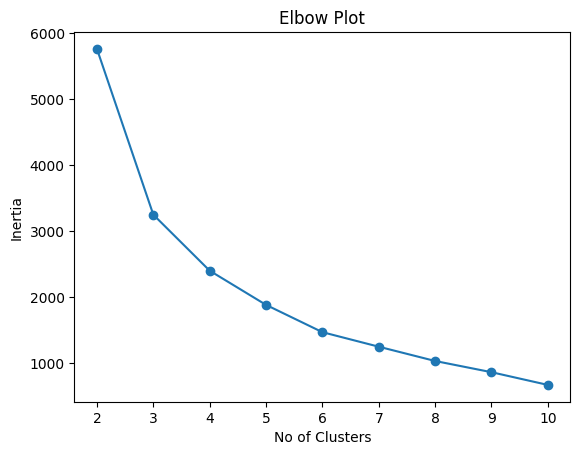

In [10]:
inertial_values = [] #sum of squared distances to the nearest centroid
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_wine)
    inertial_values.append(kmeans.inertia_)

#plotiing the elbow plot
plt.plot(k_values, inertial_values, marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_scores = []
k_values = range(2,10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_wine)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_wine, labels)
    silhouette_scores.append(silhouette_avg)
    print('For K = ', k , 'The Silhouette Score is ',silhouette_avg)
    
    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print('==========================================================')
print('The Optimal number of cluster is : ',optimal_k)

For K =  2 The Silhouette Score is  0.5177896553591894
For K =  3 The Silhouette Score is  0.4991281085927395
For K =  4 The Silhouette Score is  0.45850876420394737
For K =  5 The Silhouette Score is  0.4488199576445271
For K =  6 The Silhouette Score is  0.4441730762754557
For K =  7 The Silhouette Score is  0.4533899712110492
For K =  8 The Silhouette Score is  0.46664421856051147
For K =  9 The Silhouette Score is  0.48080007507862876
The Optimal number of cluster is :  2


# Creating Cluster with Optimal K

In [13]:
model = KMeans(n_clusters=2,random_state=42)
model.fit(df_wine)

KMeans(n_clusters=2, random_state=42)

In [14]:
model.cluster_centers_

array([[15.57142857,  8.78571429],
       [ 7.04761905, 31.57142857]])

In [15]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [16]:
df_wine['Cluster_ID'] = model.labels_

In [17]:
df_wine

,PinotNoir,Champagne,Cluster_ID
0,7,34,1
1,8,34,1
2,5,33,1
3,12,34,1
4,9,30,1
...,...,...,...
58,11,10,0
59,13,3,0
60,13,3,0
61,12,16,0


In [18]:
df_wine.to_excel('clustered_data.xlsx', index = False)

# CLuster Profile

In [19]:
df_w = df[['PinotNoir','Champagne']]

In [20]:
centroid = model.cluster_centers_

In [21]:
col_names = df_w.columns.tolist()
cluster_profile = pd.DataFrame(centroid,columns= col_names)

In [22]:
cluster_profile

,PinotNoir,Champagne
0,15.571429,8.785714
1,7.047619,31.571429


In [23]:
cluster_profile.to_excel('clsuter_profile.xlsx', index = False)

# Plotting the 2 Clusters

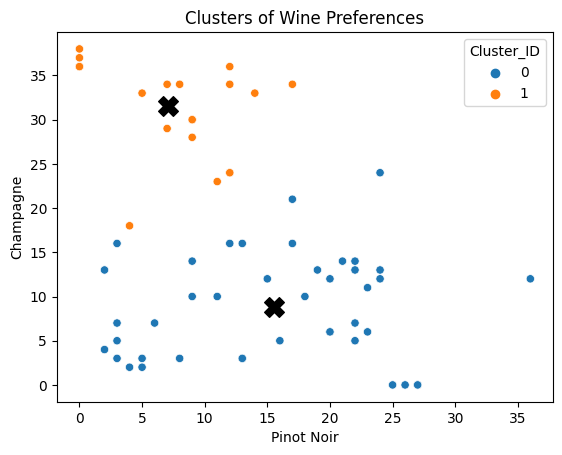

In [24]:
sns.scatterplot(x='PinotNoir', y='Champagne', hue='Cluster_ID', data=df_wine)
plt.scatter(cluster_profile['PinotNoir'], cluster_profile['Champagne'], s=200, c='black', label='Centroids', marker='X')
plt.title('Clusters of Wine Preferences')
plt.xlabel('Pinot Noir')
plt.ylabel('Champagne')
plt.show()